In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [13]:
## Import the data

In [14]:
data = pd.read_csv("C:\\Users\\akshay.arora\\Desktop\\Segmentation Case Study\\Data_Case_study.csv",encoding='utf-8')

In [15]:
data.head()

,customerid,max_purchase_amount,average_amount_purchase,No of visit,Frequency_of_visit,percentage_buys_discount,Total Number of Purchase
0,1024,93125.55,62600,10,45,50.00,8
1,7725,122979.04,92000,10,43,71.43,10
2,2196,139725.00,99999,11,40,88.89,9
3,4951,43068.48,25100,10,30,0.00,6
4,5278,44709.60,25100,11,32,0.00,11


In [16]:
data.columns

Index(['customerid', 'max_purchase_amount', 'average_amount_purchase',
       'No of visit', 'Frequency_of_visit', 'percentage_buys_discount',
       'Total Number of Purchase'],
      dtype='object')

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 7 columns):
customerid                  399 non-null int64
max_purchase_amount         399 non-null float64
average_amount_purchase     399 non-null int64
No of visit                 399 non-null int64
Frequency_of_visit          399 non-null int64
percentage_buys_discount    399 non-null float64
Total Number of Purchase    399 non-null int64
dtypes: float64(2), int64(5)
memory usage: 21.9 KB


In [18]:
data.describe()

,customerid,max_purchase_amount,average_amount_purchase,No of visit,Frequency_of_visit,percentage_buys_discount,Total Number of Purchase
count,399.000000,3.990000e+02,399.000000,399.000000,399.000000,399.000000,399.000000
mean,7159.979950,1.111784e+05,77938.112782,16.837093,15.799499,45.379699,12.498747
std,15472.600717,8.271623e+04,60563.433769,5.623088,11.710276,39.175858,4.892757
min,41.000000,3.001472e+04,20060.000000,10.000000,1.000000,0.000000,5.000000
25%,2646.000000,7.064332e+04,48065.000000,12.000000,7.000000,0.000000,9.000000
50%,5093.000000,1.124341e+05,80100.000000,16.000000,13.000000,37.500000,12.000000
75%,7521.500000,1.341798e+05,96933.000000,21.000000,22.000000,100.000000,15.000000
max,110880.000000,1.063370e+06,797500.000000,30.000000,62.000000,100.000000,29.000000


In [19]:
data=data[['max_purchase_amount', 'average_amount_purchase',
       'No of visit', 'Frequency_of_visit', 'percentage_buys_discount',
       'Total Number of Purchase']]

In [20]:
##Lets scale the data using standardscaler 
##Scaling the data is an important step .Scale of all the variables shoud be same

In [21]:
stscaler = StandardScaler().fit(data)
data = stscaler.transform(data)

In [22]:
##Run the dbscan using epsilon value of 0.9 and minimum points of 12
##Epsilon and miinmum points values have been chosen randomly .Proper profiling needs to 
##be done for the optimal epsilon and minimum points

In [23]:
dbscan=DBSCAN(eps=0.9,min_samples=12)

In [24]:
model=dbscan.fit(data)

In [25]:
labels=model.labels_

In [26]:
labels

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,  0,  0,  1,
        0,  0,  1,  2,  2,  2, -1,  2,  2,  1,  1,  1, -1,  0,  1,  1,  0,
       -1, -1, -1, -1,  3,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1, -1, -1,  1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  0,
        0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        0,  1,  1,  1,  1,  1,  1,  0,  1,  1,  1, -1, -1, -1, -1, -1, -1,
       -1,  1, -1,  0,  0, -1,  0,  0,  0,  1, -1,  0, -1, -1, -1,  1,  1,
        1, -1,  0, -1, -1, -1,  0, -1, -1,  0,  0, -1,  0,  0,  0,  0, -1,
        0,  0, -1,  0,  3, -1, -1, -1, -1, -1, -1, -1,  2,  1,  1,  1,  1,
        1,  0,  1,  0,  0, -1, -1,  2,  1,  1,  1,  1, -1, -1,  1,  1,  1,
       -1,  1,  0,  1,  1, -1,  1,  1, -1,  1,  1,  3, -1, -1, -1, -1, -1,
       -1, -1, -1, -1,  0,  0, -1, -1,  1,  1, -1,  1,  0,  1,  0,  1, -1,
        0,  0, -1,  0, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  0,  1

In [38]:
#Determine the core points
core_samples_mask=np.zeros_like(labels,dtype=bool)
core_samples_mask[dbscan.core_sample_indices_]=True

In [39]:
##Number of cluster

In [40]:
nclusters=len(set(labels))-(1 if -1 in labels else 0)

In [ ]:
#to determine the if number of clusters formed are good or not -1 indicates clusters are poorly formed
#1 indicated they are formed good

In [41]:
#The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate 
#that a sample has been assigned to the wrong cluster, as a different cluster is more similar.


metrics.silhouette_score(data,labels)

0.006389329368527196

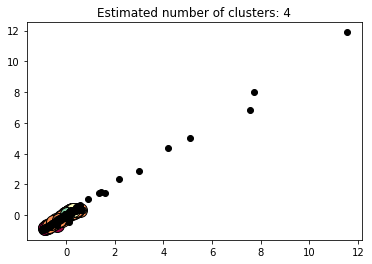

In [45]:


# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = data[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = data[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % nclusters)
plt.show()